C:\Users\student\.conda\envs\rusu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\student\.conda\envs\rusu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\student\.conda\envs\rusu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\student\.conda\envs\rusu\lib\site-packages\tensorflow\python\framework

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 9us/sample - loss: 0.9618 - acc: 0.7463
Epoch 2/5
60000/60

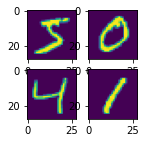

In [2]:


import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met
from sklearn.metrics import multilabel_confusion_matrix

def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()


# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# train i test podaci
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# prikaz karakteristika train i test podataka
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# TODO: prikazi nekoliko slika iz train skupa
fig = plt.figure(figsize=(2,2))
fig.add_subplot(2,2,1)
plt.imshow(x_train[0])
fig.add_subplot(2,2,2)
plt.imshow(x_train[1])
fig.add_subplot(2,2,3)
plt.imshow(x_train[2])
fig.add_subplot(2,2,4)
plt.imshow(x_train[3])


# skaliranje slike na raspon [0,1]
x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255

# slike trebaju biti (28, 28, 1)
x_train_s = np.expand_dims(x_train_s, -1)
x_test_s = np.expand_dims(x_test_s, -1)

print("x_train shape:", x_train_s.shape)
print(x_train_s.shape[0], "train samples")
print(x_test_s.shape[0], "test samples")


# pretvori labele
y_train_s = keras.utils.to_categorical(y_train, num_classes)
y_test_s = keras.utils.to_categorical(y_test, num_classes)


# TODO: kreiraj model pomocu keras.Sequential(); prikazi njegovu strukturu
model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.summary()


# TODO: definiraj karakteristike procesa ucenja pomocu .compile()

model.compile(loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

# TODO: provedi ucenje mreze

model.fit(x_train_s, y_train_s, epochs=5, batch_size=1000)

# TODO: Prikazi test accuracy i matricu zabune

classes = model.predict(x_test_s, batch_size=1000)

classes_s = np.zeros_like(classes)
classes_s[np.arange(len(classes)),classes.argmax(1)] = 1

print(multilabel_confusion_matrix(y_test_s,classes_s))


# TODO: spremi model
model.save("model.h5")


In [3]:
modelConv = keras.Sequential()
modelConv.add(layers.Conv2D(28,(3,3), activation='relu', input_shape=input_shape))
modelConv.add(layers.MaxPooling2D((2,2)))
modelConv.add(layers.Conv2D(56,(3,3), activation='relu'))
modelConv.add(layers.MaxPooling2D((2,2,)))
modelConv.add(layers.Flatten())
modelConv.add(layers.Dense(units=64, activation='relu'))
modelConv.add(layers.Dense(units=10, activation='softmax'))
modelConv.summary()

# TODO: definiraj karakteristike procesa ucenja pomocu .compile()

modelConv.compile(loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

# TODO: provedi ucenje mreze

modelConv.fit(x_train_s, y_train_s, epochs=5, batch_size=1000)

# TODO: Prikazi test accuracy i matricu zabune

classes = model.predict(x_test_s, batch_size=1000)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                89664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [5]:
classes_s = np.zeros_like(classes)
classes_s[np.arange(len(classes)),classes.argmax(1)] = 1

print(multilabel_confusion_matrix(y_test_s,classes_s))

modelConv.save("modelConv.h5")
    

[[[8970   50]
  [  17  963]]

 [[8835   30]
  [  24 1111]]

 [[8903   65]
  [  88  944]]

 [[8914   76]
  [  79  931]]

 [[8936   82]
  [  50  932]]

 [[9055   53]
  [  91  801]]

 [[8994   48]
  [  53  905]]

 [[8918   54]
  [  69  959]]

 [[8911  115]
  [  76  898]]

 [[8926   65]
  [  91  918]]]


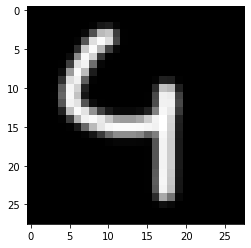

AttributeError: 'str' object has no attribute 'decode'

In [13]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from matplotlib import pyplot as plt
from skimage.transform import resize
from skimage import color
import matplotlib.image as mpimg
import numpy as np

filename = 'test.png'

img = mpimg.imread(filename)[:,:,:3]
img = color.rgb2gray(img)
img = resize(img, (28, 28))


plt.figure()
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()


img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')


# TODO: ucitaj model
model = load_model("modelConv.h5")


# TODO: napravi predikciju 

classes = model.predict(img)
print(classes)

# TODO: ispis rezultat
print("------------------------")
print()



